# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


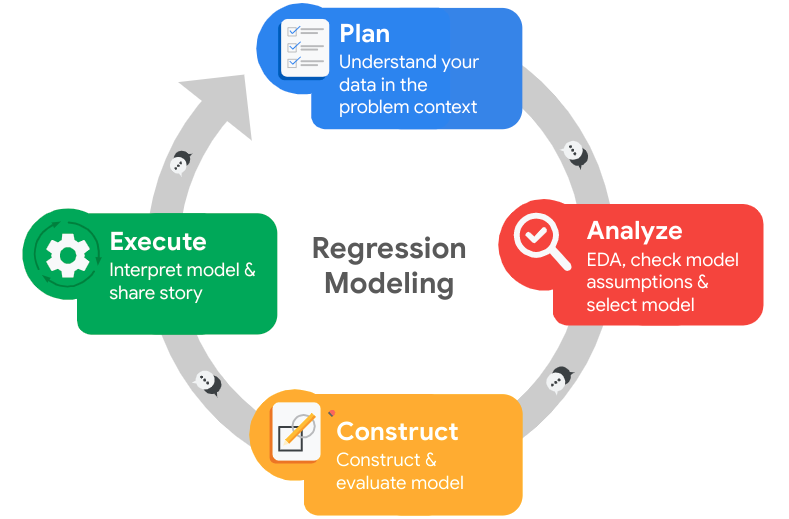

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?
    *  HR department at Salifort Motors
    *  Company management
    *  Employees (indirectly, as the outcome may affect their work environment)
    *  Data analytics team (you and your colleagues)
- What are you trying to solve or accomplish?
    *  Analyze the HR dataset to identify factors contributing to employee turnover.
    *  Build a predictive model to determine the likelihood of an employee leaving the company.
    *  Provide actionable insights to the HR department to improve employee retention.
- What are your initial observations when you explore the data?
    *  The dataset contains a mix of numerical andcategorical variables.
    *  The target variable is `left`, indicating whether an employee has left the company.
    *  There may be potential correlations between variables such as satisfaction level, number of projects, and likelihood of leaving.
    *  Some columns may require cleaning or transformation (e.g., salary levels).
- What are some potential challenges you might face in this project?
    *  Data quality issues (missing values, outliers, inconsistencies)
    *  Ensuring the model is interpretable and actionable for HR
    *  Balancing model accuracy with ethical considerations (e.g., avoiding bias)
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
    *  [Kaggle HR Analytics Dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv)
- Do you have any ethical considerations in this stage?
    *  Ensuring employee privacy and data confidentiality.
    *  Avoiding bias in the predictive model that could unfairly target certain groups of employees.
    *  Providing recommendations that are fair and equitable for all employees.




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [75]:
# Import packages
### YOUR CODE HERE ###

# for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import boxplot

# for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.naive_bayes import GaussianNB


# for model evaluation and selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()
# There are no missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'Work_accident': 'work_accident',
                    'time_spend_company': 'tenure',
                    'last_evaluation': 'last_eval',
                    'average_monthly_hours': 'avg_monthly_hrs',
                    'number_project': 'num_projects',
                    'satisfaction_level': 'satisfaction',
                    'promotion_last_5years': 'promoted_last_5yrs',
                    'Department':'department'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction', 'last_eval', 'num_projects', 'average_montly_hours',
       'tenure', 'work_accident', 'left', 'promoted_last_5yrs', 'department',
       'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [14]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction            0
last_eval               0
num_projects            0
average_montly_hours    0
tenure                  0
work_accident           0
left                    0
promoted_last_5yrs      0
department              0
salary                  0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [18]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [19]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].sort_values(list(df0.columns)).head()

,satisfaction,last_eval,num_projects,average_montly_hours,tenure,work_accident,left,promoted_last_5yrs,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium


In [135]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
print('Before drop duplicates:', df0.shape)
print(f'After drop duplicates: {df1.shape}')

Before drop duplicates: (14999, 10)
After drop duplicates: (11991, 10)


### Check outliers

Check for outliers in the data.

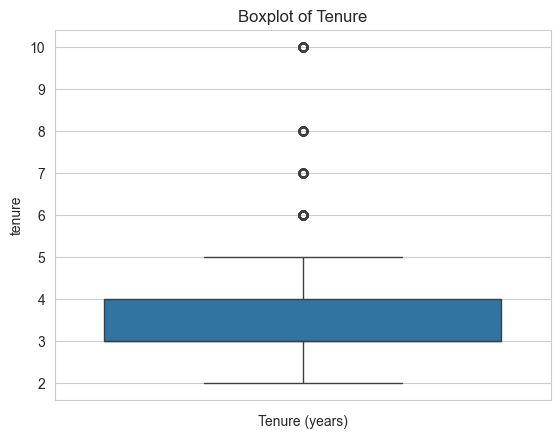

In [36]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df1['tenure'])
plt.title('Boxplot of Tenure')
plt.xlabel('Tenure (years)')
plt.show()


In [100]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'lower_bound is {lower_bound} \nupper_bound is {upper_bound}')
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f'Number of outliers: {len(outliers)}')
    return

for col in df1.select_dtypes(include=['float64', 'int64']).columns:
    print(f'Outliers in {col}:')
    find_outliers(df1[col])
    print('---')


Outliers in satisfaction:
lower_bound is -0.030000000000000027 
upper_bound is 1.33
Number of outliers: 0
---
Outliers in last_eval:
lower_bound is 0.1349999999999999 
upper_bound is 1.295
Number of outliers: 0
---
Outliers in num_projects:
lower_bound is 0.0 
upper_bound is 8.0
Number of outliers: 0
---
Outliers in average_montly_hours:
lower_bound is 28.0 
upper_bound is 372.0
Number of outliers: 0
---
Outliers in tenure:
lower_bound is 1.5 
upper_bound is 5.5
Number of outliers: 824
---
Outliers in work_accident:
lower_bound is 0.0 
upper_bound is 0.0
Number of outliers: 1850
---
Outliers in left:
lower_bound is 0.0 
upper_bound is 0.0
Number of outliers: 1991
---
Outliers in promoted_last_5yrs:
lower_bound is 0.0 
upper_bound is 0.0
Number of outliers: 203
---


Only the `tenure` column has outliers, with 824 employees are above the upper bound of 8.0 years. This means that these employees have been with the company for a long time compared to their peers.

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [46]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df1['left'].value_counts()/len(df1)*100

left
0    83.39588
1    16.60412
Name: count, dtype: float64

The dependent variable `left` is categorical, with two possible values: 1 (the employee left) and 0 (the employee stayed). About 16.6% of employees in this dataset left the company.
The distribution of the target variable is **imbalanced**, with many more employees staying than leaving. This is important to keep in mind when you get to the stage of building your predictive model.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

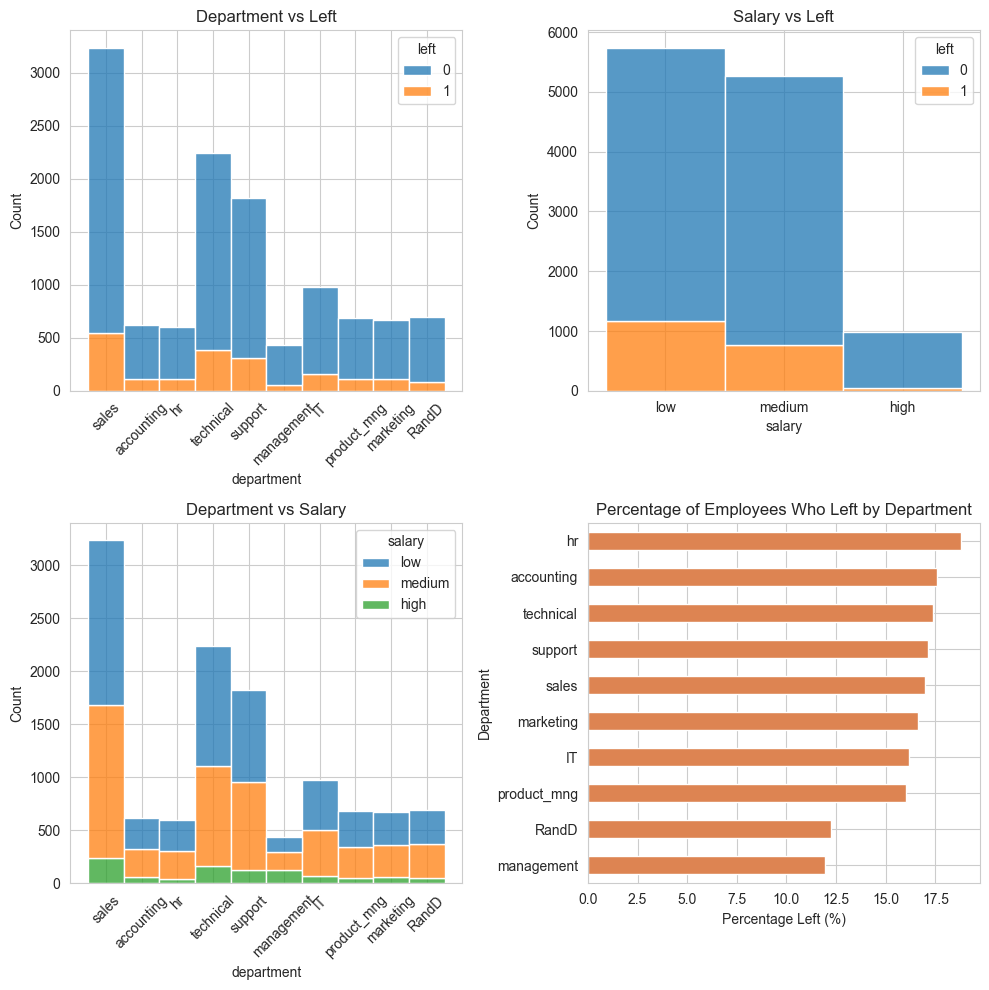

In [162]:
# Create a plot for 2 categorical variables: department vs. left and salary vs. left
### YOUR CODE HERE ###
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.histplot(data=df1, x='department', hue='left', multiple='stack')
plt.title('Department vs Left')
plt.xticks(rotation=45)
plt.subplot(2, 2, 2)
sns.histplot(data=df1, x='salary', hue='left', multiple='stack')
plt.title('Salary vs Left')
plt.subplot(2, 2, 3)
sns.histplot(data=df1, x='department', hue='salary', multiple='stack')
plt.title('Department vs Salary')
plt.xticks(rotation=45)
plt.subplot(2, 2, 4)
dept_left_pct = df1.groupby('department')['left'].mean() * 100
dept_left_pct.sort_values(ascending=True).plot(kind='barh', color= '#DD8452')
plt.xlabel('Percentage Left (%)')
plt.title('Percentage of Employees Who Left by Department')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

For categorical variables: salary and department, the following observations can be made:
1. The sales department has the highest number of employees who left, followed by technical and support departments. However, this could be due to the fact that these departments have more employees overall.
2. The salary distribution shows that most employees have a low salary, and very few have a high salary. Employees with a low salary are more likely to leave the company compared to those with medium or high salaries.

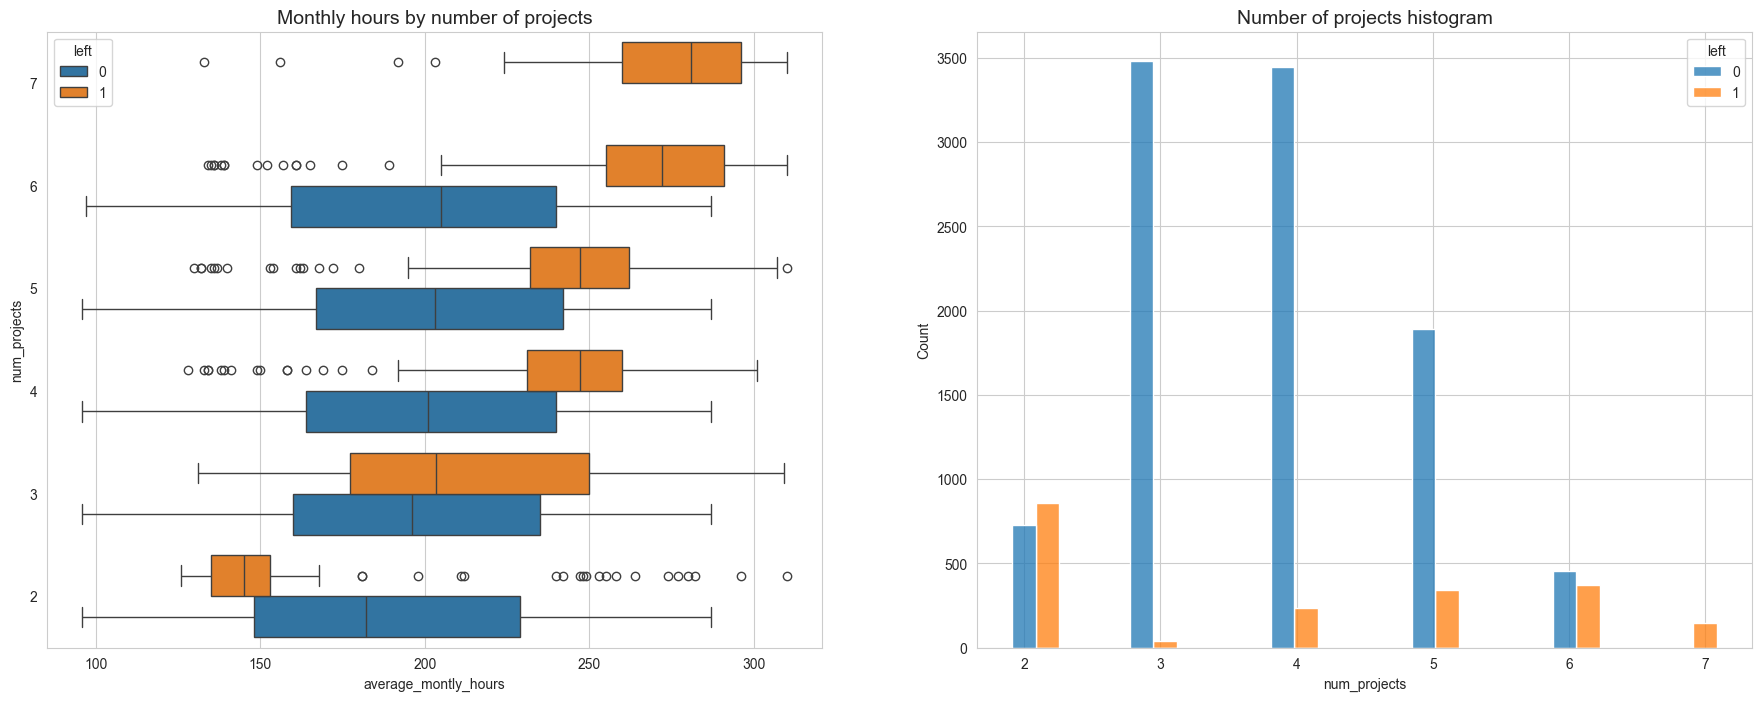

In [54]:

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_montly_hours', y='num_projects', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['num_projects']
tenure_left = df1[df1['left']==1]['num_projects']
sns.histplot(data=df1, x='num_projects', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects.

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group.

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

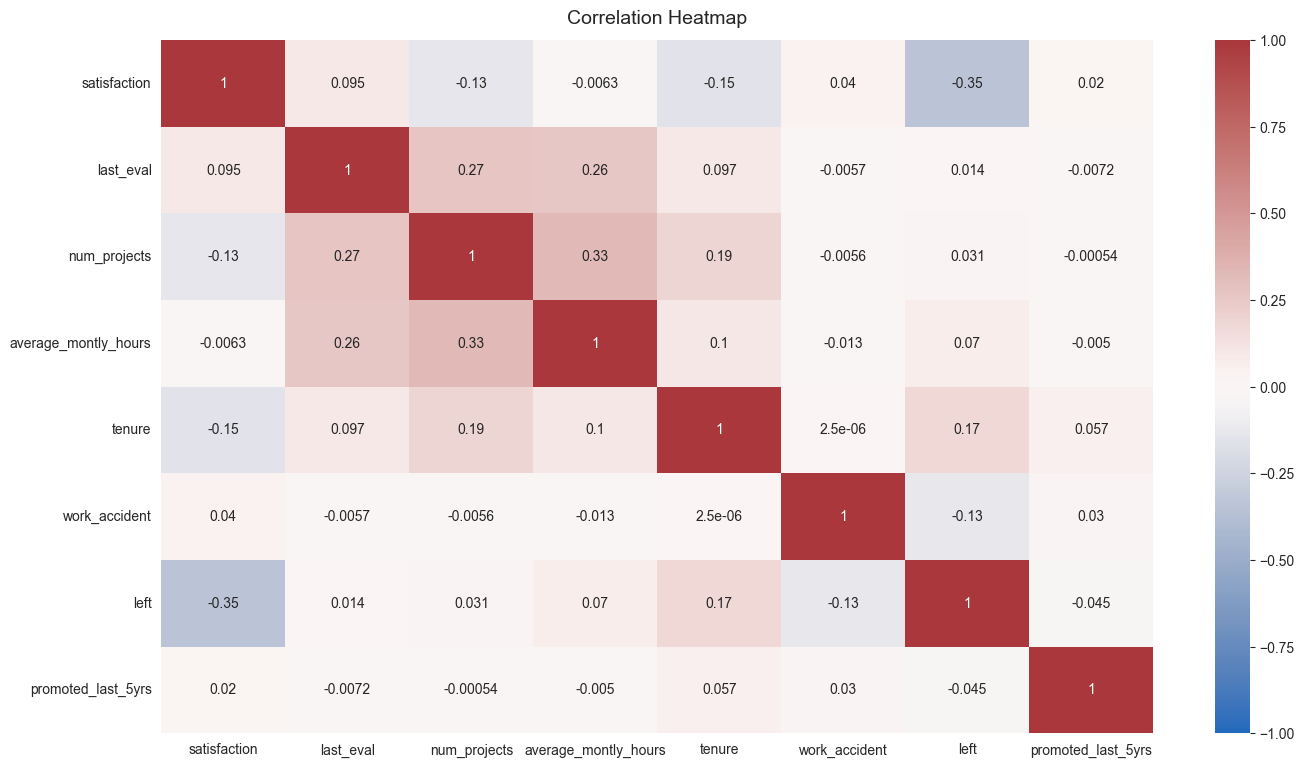

In [58]:
# Plot a correlation heatmap

plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df1.select_dtypes(include='number').corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

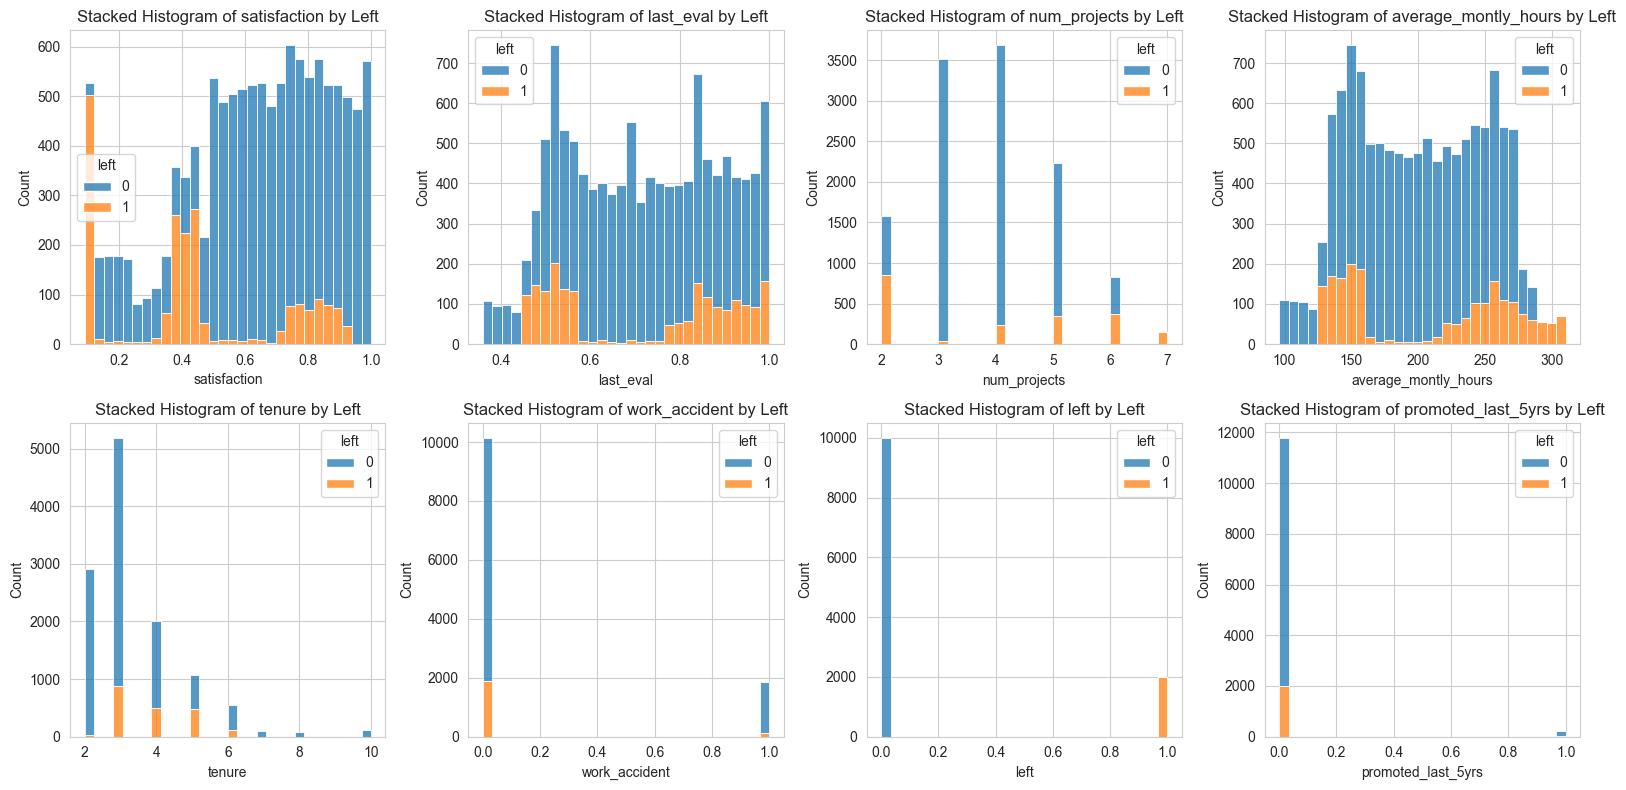

In [142]:
# Distribution of Numeric Variables
numeric_cols = df1.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(16,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.histplot(data=df1, x=col, hue='left', multiple='stack', bins=30)
    plt.title(f'Stacked Histogram of {col} by Left')
plt.tight_layout()
plt.show()

In [104]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


In [ ]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a **classification** task, because the outcome variable (`left`) is categorical (binary: 0 = stayed, 1 = left).

### Identify the types of models most appropriate for this task.

Because this is a classification task, you could consider using classification models such as:
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boosting Machines (e.g., XGBoost)
- Naive Bayes (as base line model)

### Modeling

Add as many cells as you need to conduct the modeling process.

In [60]:

# Convert categorical variables to dummy/indicator variables
df_model = pd.get_dummies(df1, columns=['department', 'salary'], drop_first=True)
# Define feature variables (X) and target variable (y)
X = df_model.drop(columns=['left'])
y = df_model['left']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [61]:
# Initialize and fit a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)
# Evaluate the model

In [62]:
# Initialize and fit a Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)
# Make predictions on the test set
y_pred_dec_tree = dec_tree.predict(X_test)

In [63]:
# Initialize and fit a Random Forest model
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)
# Make predictions on the test set
y_pred_rand_forest = rand_forest.predict(X_test)

In [69]:
# find the feature importance using RandomForestClassifier
importances = rand_forest.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Display the feature importance
print(feature_importance_df)

                   Feature  Importance
0             satisfaction    0.334140
2             num_projects    0.173008
4                   tenure    0.166599
3     average_montly_hours    0.155732
1                last_eval    0.131235
5            work_accident    0.008442
16              salary_low    0.006254
13        department_sales    0.003941
17           salary_medium    0.003411
15    department_technical    0.003309
14      department_support    0.002789
7         department_RandD    0.001942
10   department_management    0.001700
11    department_marketing    0.001587
6       promoted_last_5yrs    0.001528
12  department_product_mng    0.001514
9            department_hr    0.001456
8    department_accounting    0.001413


In [64]:
# Initialize and fit a Random Forest model with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
# Make predictions on the test set using the best estimator
best_rand_forest = grid_search.best_estimator_
y_pred_best_rand_forest = best_rand_forest.predict(X_test)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max

In [70]:
# Initialize xgboost model
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [20:15:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [76]:
# Initialize and fit a naive bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
# Make predictions on the test set
y_pred_gnb = gnb.predict(X_test)

In [166]:
# balance the dataset using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
y_resampled.value_counts()

left
0    7999
1    7999
Name: count, dtype: int64

In [168]:
#build a pipeline to test with different models
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
# Define a function to create a pipeline and evaluate models
def evaluate_model(model, X, y):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
    return scores.mean()
# Evaluate different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Gaussian Naive Bayes': GaussianNB()
}
results = {}
for model_name, model in models.items():
    f1_score = evaluate_model(model, X_resampled, y_resampled)
    results[model_name] = f1_score
# Display the results
results_df_after_smote = pd.DataFrame.from_dict(results, orient='index', columns=['F1 Score'])
print(results_df_after_smote.sort_values(by='F1 Score', ascending=False))

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [23:20:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [23:20:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [23:20:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/xgboost/core.py:158: UserWarning: [23:20:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner

                      F1 Score
XGBoost               0.978413
Random Forest         0.976569
Decision Tree         0.955010
Logistic Regression   0.834006
Gaussian Naive Bayes  0.760061


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




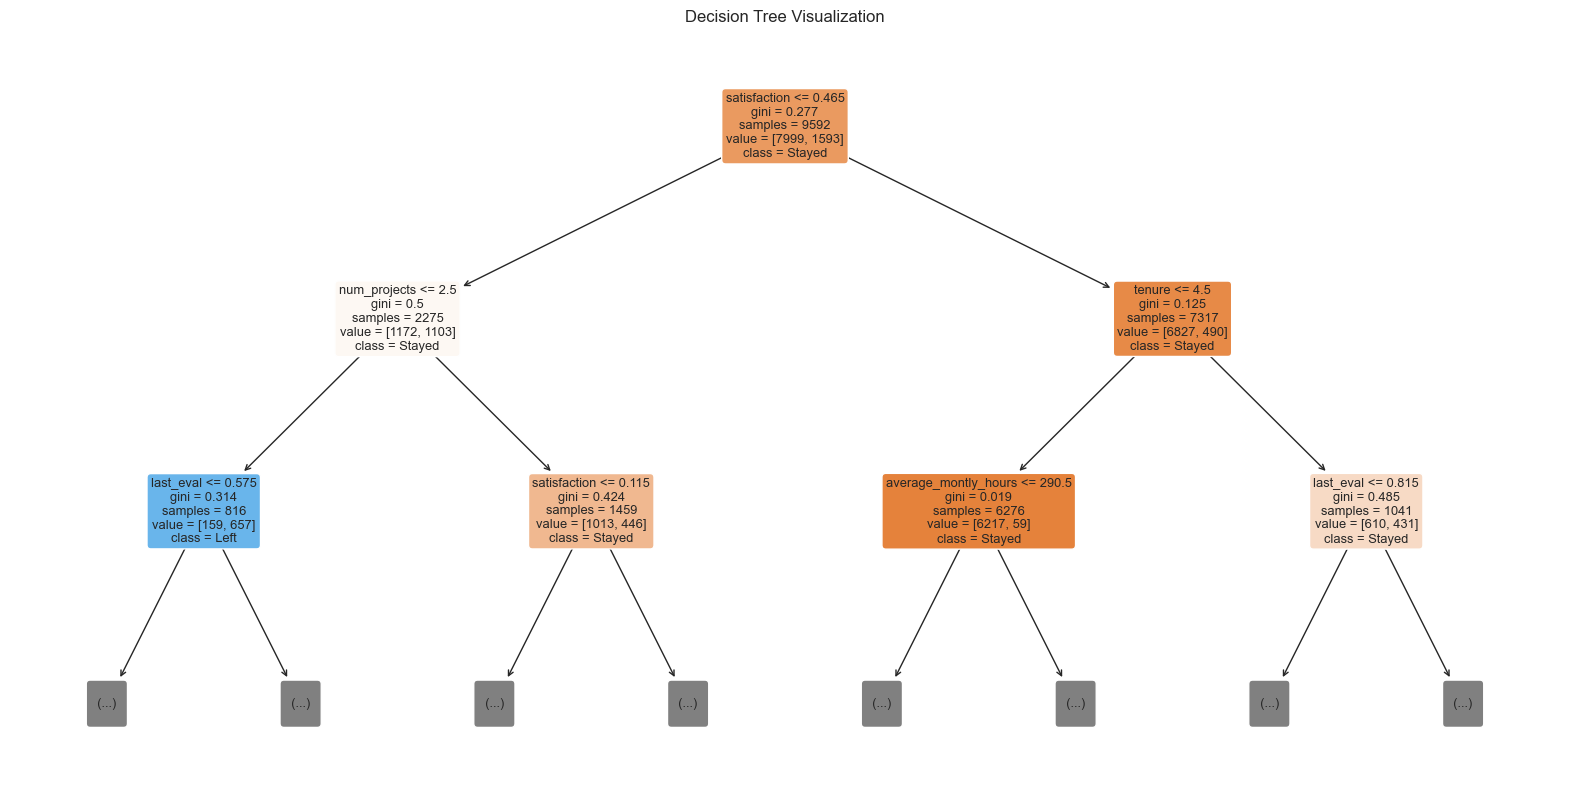

In [79]:
# visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dec_tree, filled=True, feature_names=X.columns, class_names=['Stayed', 'Left'], max_depth=2, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

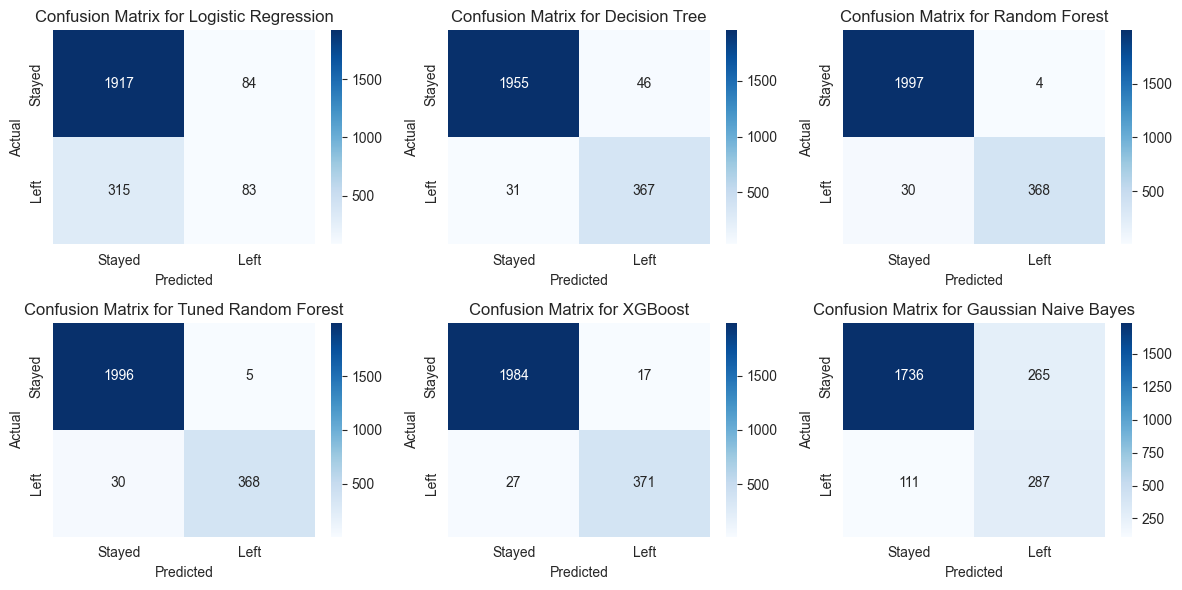

In [96]:
# plot confusion matrix for all models in a 3*2 grid

models = {
    'Logistic Regression': y_pred_log_reg,
    'Decision Tree': y_pred_dec_tree,
    'Random Forest': y_pred_rand_forest,
    'Tuned Random Forest': y_pred_best_rand_forest,
    'XGBoost': y_pred_xgb,
    'Gaussian Naive Bayes': y_pred_gnb
}

fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()
for i, (model_name, y_pred) in enumerate(models.items()):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'], ax=axes[i])
    axes[i].set_ylabel('Actual')
    axes[i].set_xlabel('Predicted')
    axes[i].set_title(f'Confusion Matrix for {model_name}')
plt.tight_layout()
plt.show()


In [98]:

# List of model names and predictions
model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Tuned Random Forest",
    "XGBoost",
    "Naive Bayes"
]
y_preds = [
    y_pred_log_reg,
    y_pred_dec_tree,
    y_pred_rand_forest,
    y_pred_best_rand_forest,
    y_pred_xgb,
    y_pred_gnb
]

# Calculate metrics for each model
results = []
for y_pred in y_preds:
    results.append({
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred)
    })

# Create DataFrame order by f1-score
metrics_df = pd.DataFrame(results, index=model_names)
print(metrics_df.sort_values(by='F1-score', ascending=False))

                     Accuracy  Precision    Recall  F1-score       AUC
Random Forest        0.985827   0.989247  0.924623  0.955844  0.961312
Tuned Random Forest  0.985411   0.986595  0.924623  0.954604  0.961062
XGBoost              0.981659   0.956186  0.932161  0.944020  0.961833
Decision Tree        0.967903   0.888620  0.922111  0.905055  0.949561
Naive Bayes          0.843268   0.519928  0.721106  0.604211  0.794336
Logistic Regression  0.833681   0.497006  0.208543  0.293805  0.583282


Results after applying SMOTE to balance the dataset
| Model                | F1 Score  |
|----------------------|----------|
| XGBoost              | 0.978413 |
| Random Forest        | 0.976569 |
| Decision Tree        | 0.955010 |
| Logistic Regression  | 0.834006 |
| Gaussian Naive Bayes | 0.760061 |

### Summary of model results
**Models**:
- Logistic Regression has lowest performance across all metrics compared to the other models. As we can see from heat map, it's hard to find a strong linear relationship between independent variables and the outcome variable. And some varibales have outliers, which also violates the assumptions of logistic regression. Besides, the distribution of dependent varible is unbalance, which leads to low precision and recalls. To improve the performance of logistic regression, we could try feature engineering, removing outliers, or using regularization techniques.
- Random Forest has a higher performance than Tuned Random Forest. This could be due to overfitting in the tuned model, or the hyperparameters chosen may not have been optimal. To improve the performance of the tuned model, we could try a wider range of hyperparameters, use cross-validation, or try different tuning methods.
- XGBoost has the highest performance across all metrics. This is likely due to its ability to handle complex relationships and interactions between variables. To further improve the performance of XGBoost, we could try tuning its hyperparameters, using feature engineering, or using ensemble methods.
- After balancing the dataset using SMOTE, the performance of all models didn't improve significantly. This could be due to models were already able to handle the imbalance well. To further improve the performance of the models, we could try different balancing techniques, use ensemble methods, or try different models altogether.
**Variables**:
- The feature importance analysis from the Random Forest model indicates that `satisfaction`, `last_eval`, and `num_projects` are the most important features in predicting whether an employee will leave the company. This suggests that employees with low satisfaction levels, poor performance evaluations, and those working on multiple projects are more likely to leave.
- The correlation heatmap shows that `satisfaction` has a strong negative correlation with `left`, indicating that higher satisfaction levels are associated with a lower likelihood of leaving.
- The boxplot and histogram visualizations reveal that employees who left the company tend to have worked longer hours and on more projects compared to those who stayed. This suggests that overwork may be a contributing factor to employee attrition.
- The countplots for `department` and `salary` indicate that certain departments and lower salary levels have higher attrition rates. This suggests that employees in these departments or with lower salaries may be more dissatisfied and thus more likely to leave.
- Overall, the analysis suggests that improving employee satisfaction, managing workload, and addressing salary concerns could help reduce employee attrition at Salifort Motors.


### Conclusion, Recommendations, Next Steps

**Conclusion**:
- The analysis of the HR dataset from Salifort Motors has revealed several key factors that contribute to employee attrition. The predictive models, particularly XGBoost, have demonstrated strong performance in identifying employees who are likely to leave the company. Key variables such as **employee satisfaction**, **number of projects**, **tenure**, **workload** have been identified as significant predictors of attrition. The insights gained from this analysis provide a solid foundation for the HR department to implement targeted strategies aimed at improving employee retention.

**Recommendations**:
1. **Enhance Employee Satisfaction**: Implement regular employee satisfaction surveys to identify areas of concern and address them promptly. Consider initiatives such as flexible work arrangements, recognition programs, and opportunities for career development.
2. **Manage Workload**: Monitor employee workloads to ensure they are manageable. Consider redistributing projects or hiring additional staff to prevent burnout and overwork.
3. **Review Compensation Packages**: Conduct a market analysis to ensure that salary levels are competitive. Consider offering performance-based bonuses or salary adjustments to retain top talent.
4. **Focus on High-Risk Departments**: Identify departments with high attrition rates and investigate the underlying causes. Implement targeted interventions to improve the work environment and employee engagement in these areas.
5. **Improve Performance Evaluations**: Ensure that performance evaluations are fair, transparent, and constructive. Provide training for managers on effective evaluation techniques and feedback delivery.
6. **Implement Retention Programs**: Develop programs aimed at retaining high-risk employees, such as mentorship programs, career pathing, and succession planning.
7. **Regularly Review HR Policies**: Continuously assess and update HR policies to ensure they align with employee needs and industry best practices.
8. **Leverage Data Analytics**: Continue to use data analytics to monitor employee trends and predict potential attrition, allowing for proactive interventions.
By implementing these recommendations, Salifort Motors can improve employee satisfaction and retention, ultimately benefiting the company's overall performance and culture.

**Next Steps**:
1. **Conduct Further Analysis**: Explore additional variables that may impact employee attrition, such as work-life balance, management style, and team dynamics.
2. **Implement Predictive Analytics**: Develop a real-time dashboard to monitor employee satisfaction and attrition risk, allowing HR to take proactive measures.
3. **Pilot Retention Initiatives**: Test the effectiveness of proposed retention initiatives in select departments before a company-wide rollout.
4. **Gather Employee Feedback**: Regularly solicit feedback from employees on the effectiveness of implemented changes and adjust strategies accordingly.
5. **Collaborate with Management**: Work closely with company leadership to ensure alignment on retention strategies and secure necessary resources for implementation.
6. **Monitor and Evaluate**: Continuously track the impact of retention strategies on employee satisfaction and attrition rates, making data-driven adjustments as needed.